# Softmax regression

The first part discusses the theoretical background while the second part discusses an example on MNIST.

## Theoretical background

Logistic regression is a binary classification method therefore it is useful for solving classification problems with two classes. If we want to solve a problem with $k>2$ classes we talk about multiclassification problems. Softmax regression is a method dealing with multiclassification problems. The idea is similar to the logistic regression but instead of a sigmoid function a softmax is applied.

\begin{equation*}
s_\Theta(x) = \left[ \frac{e^{\Theta_1 x}}{\sum_{i=1}^n{e^{\Theta_i x}}}, ..., \frac{e^{\Theta_n x}}{\sum_{i=1}^n{e^{\Theta_i x}}} \right]
\end{equation*}

$x$ is the input vector while $\Theta_i$ is a parameter vector. $\Theta$is a matrix in which each row is parameter vector, therefore the number of rows are equal with the number of classes. $s_\Theta$ is a vector as well, cotaining a probability value for each class. E.g.: 

\begin{equation*}
P\left( y = j| x; \Theta \right) = \frac{e^{\Theta_j x}}{\sum_{i=1}^n{e^{\Theta_i x}}}
\end{equation*}

For the whole training set $\left( \underline{x}, \underline{y} \right)$, the probability of a training set (assumed the samples are independent):

\begin{equation*}
P\left( \underline{y}|\underline{x}; \Theta \right) = 
\Pi_{m=1}^M{\Pi_{k=1}^K{\left( \frac{e^{\Theta_k x^{(m)}}}{\sum_{i=1}^n{e^{\Theta_i x^{(m)}}}}\right)^{I[y_k^{(m)}=1]}}}
\end{equation*}

The $\Theta$ parameter which maximizes this probability is the best. To find the maximum we can take the logarithm of P then calculate its gradient, finally a gradient ascent method can be applied to find the solution. It can be successful because the error surface (-P) is convex but the solution is not unique which makes a bit more difficult to converge. 

\begin{equation*}
J(\Theta) = \log P\left( \underline{y}|\underline{x}; \Theta \right) = 
\sum_{m=1}^M{\sum_{k=1}^K{I[y_k^{(m)}=1] \log \left( \frac{e^{\Theta_k x^{(m)}}}{\sum_{i=1}^n{e^{\Theta_i x^{(m)}}}}\right)}}
\end{equation*}

The derivative of this:

\begin{equation*}
\nabla_\Theta J(\theta) = \frac{\partial}{\partial \Theta} \log P =
\sum_{m=1}^M{ \left( y^{(m)} - s_\Theta \left(x^{(m)} \right) \right) x^{(m)}}
\end{equation*}

Then the update rule:

\begin{equation*}
\Theta_{t+1} = \Theta_t + \alpha \cdot \nabla_\Theta J(\Theta)
\end{equation*}

## Softmax regression for MNIST

In [1]:
from softmax_regression import softreg
from pckutils import mnist
import numpy as np
from matplotlib import pyplot as plt
import os

### Loading MNIST data

In [2]:
url_train_image = "http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz"
url_train_label = "http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz"
url_test_image = "http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz"
url_test_label = "http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz"

In [3]:
# download packages if it was not downloaded
train_imgs_file_name = "data/training_mnist_imgs.gz"
train_lbls_file_name = "data/training_mnist_lbls.gz"
test_imgs_file_name = "data/test_mnist_imgs.gz"
test_lbls_file_name = "data/test_mnist_lbls.gz"

# checking if a file exists
train_I = os.path.exists(train_imgs_file_name)
train_L = os.path.exists(train_lbls_file_name)
test_I = os.path.exists(test_imgs_file_name)
test_L = os.path.exists(test_lbls_file_name)

if not train_I:
    mnist.download(url_train_image, train_imgs_file_name)
    mnist.unzip(train_imgs_file_name)
    print("train_I done.")
    
if not train_L:
    mnist.download(url_train_label, train_lbls_file_name)
    mnist.unzip(train_lbls_file_name)
    print("train_L done.")
    
if not test_I:
    mnist.download(url_test_image, test_imgs_file_name)
    mnist.unzip(test_imgs_file_name)
    print("test_I done.")
    
if not test_L:
    mnist.download(url_test_label, test_lbls_file_name)
    mnist.unzip(test_lbls_file_name)
    print("test_L done.")

In [4]:
# load in the images and labels
train_imgs_file_name = "data/training_mnist_imgs.mnist"
train_lbls_file_name = "data/training_mnist_lbls.mnist"
test_imgs_file_name = "data/test_mnist_imgs.mnist"
test_lbls_file_name = "data/test_mnist_lbls.mnist"

# training images
mgb, num_train_imgs, rows, cols, x_train_s = mnist.read_img(train_imgs_file_name)
assert mgb == 2051, "Wrong magic number when training images were loaded!"

# training labels (number of labels are the same as number of images)
mgb, _, y_train_s = mnist.read_label(train_lbls_file_name)
assert mgb == 2049, "Wrong magic number when training labels were loaded!"

# test images (test image size is the same)
mgb, num_test_imgs, _, _, x_test_s = mnist.read_img(test_imgs_file_name)
assert mgb == 2051, "Wrong magic number when test images were loaded!"

# test labels
mgb, _, y_test_s = mnist.read_label(test_lbls_file_name)
assert mgb == 2049, "Wrong magic number when test labels were loaded!"

2051 60000 28 28
Reading images: [100%]
2049 60000
Reading labels: [100%]
2051 10000 28 28
Reading images: [100%]
2049 10000
Reading labels: [100%]


### Doing softmax regression

In [5]:
# parameters
data = (x_train_s, y_train_s)
k = 10
lr = 0.1
max_iter = 400
batch_size = 6000
epoch = 1

In [6]:
theta, train_e = softreg.softmax_regression(data, k, lr, max_iter, batch_size, epoch=epoch, verbose=True)

Iterating: [100%]


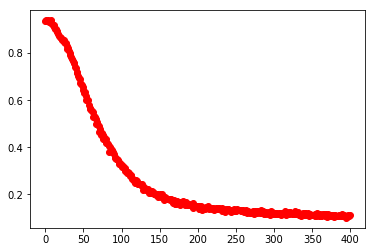

In [7]:
# reporting learning curve
plt.figure(1)
x_axis_train = [x for x in range(len(train_e))]
plt.plot(x_axis_train, train_e, 'ro')
plt.show()

In [12]:
# calculating error rate on the test set
errors = 0.0
for x, y in zip(x_test_s, y_test_s):
    x = x/255.0
    if np.argmax(softreg.predict(theta, x)) != y:
        errors += 1.0

error_rate = errors/num_test_imgs * 100.0
print('The error rate: %.2f%%' %error_rate)

The error rate: 13.47%
